<a href="https://colab.research.google.com/github/Deepak-gautam1/Stock_Price_Predication/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
!pip install -q yfinance

In [93]:
#IMPORTING STANDARD LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

**Importing Apple,Google,Microsoft,Amazoan Stock Prices**


In [94]:

from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,191.443314,31458200,APPLE
2023-07-05,191.570007,192.979996,190.619995,191.330002,190.319260,46920300,APPLE
2023-07-06,189.839996,192.020004,189.199997,191.809998,190.796722,45094300,APPLE
2023-07-07,191.410004,192.669998,190.240005,190.679993,189.672684,46778000,APPLE
2023-07-10,189.259995,189.990005,187.039993,188.610001,187.613632,59922200,APPLE
2023-07-11,189.160004,189.300003,186.600006,188.080002,187.086441,46638100,APPLE
2023-07-12,189.679993,191.699997,188.470001,189.770004,188.767502,60750200,APPLE
2023-07-13,190.500000,191.190002,189.779999,190.539993,189.533417,41342300,APPLE
2023-07-14,190.229996,191.179993,189.630005,190.690002,189.682648,41573900,APPLE


In [95]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()


In [96]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,184.170518,185.759084,182.701992,184.233267,183.762561,6.031618e+07
std,10.970476,11.126176,10.832340,10.961076,11.001378,2.481566e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.244995,177.025002,173.660004,175.280006,174.800781,4.678545e+07
50%,183.550003,185.089996,181.919998,183.860001,183.394653,5.366560e+07
75%,191.425003,192.620003,190.209999,191.389999,190.936531,6.617330e+07
max,217.589996,220.199997,213.000000,216.750000,216.750000,2.464214e+08


In [97]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-07-03 to 2024-07-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


**DATA VISUALISATION**

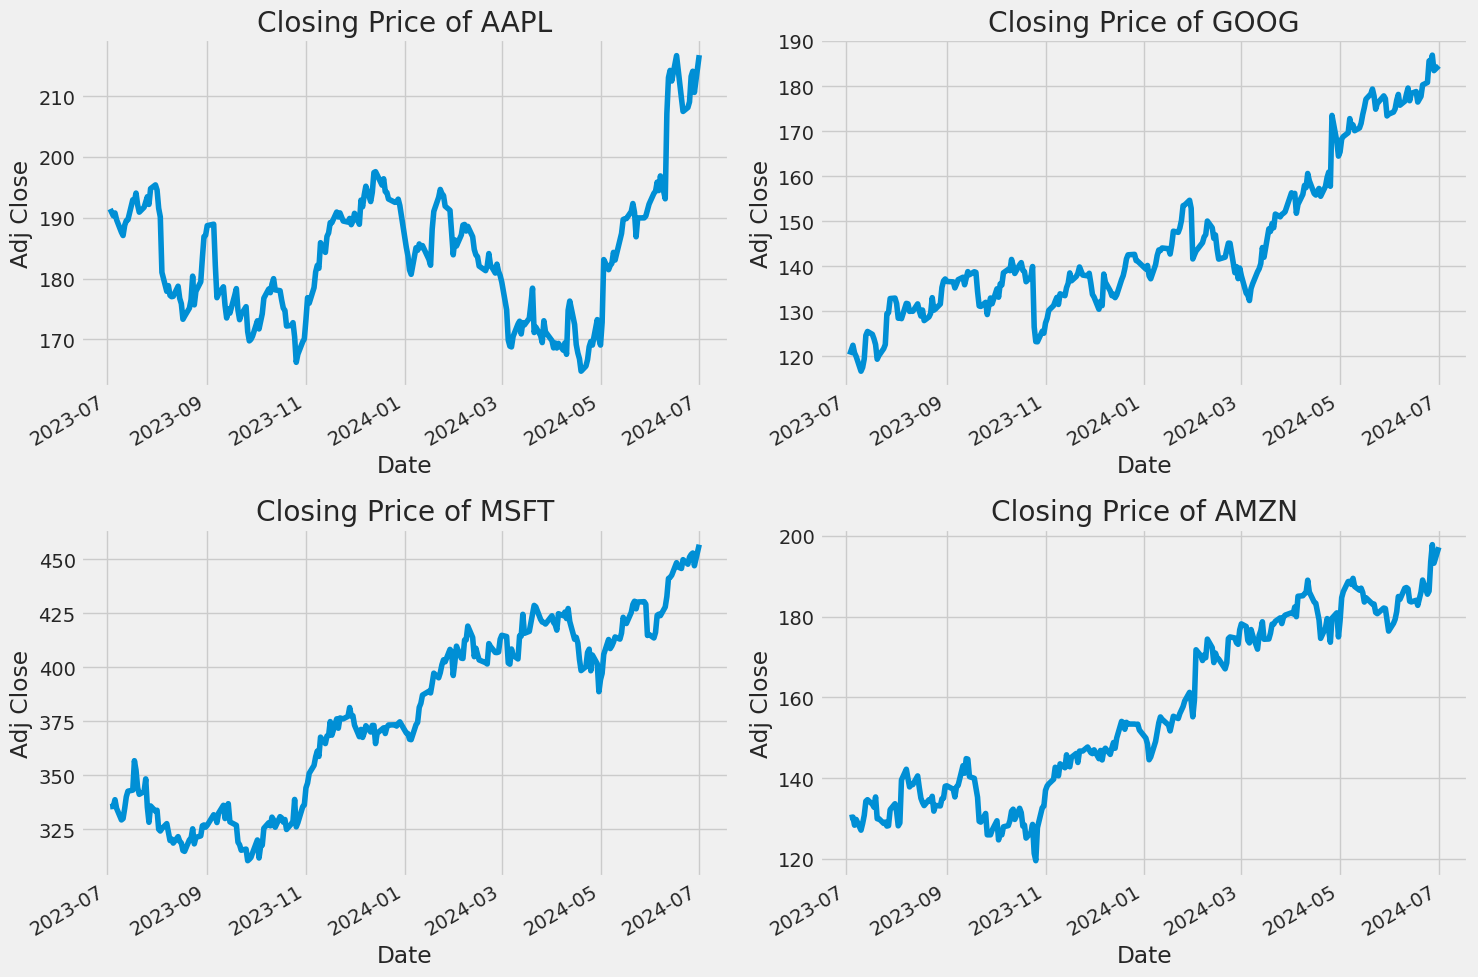

In [98]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

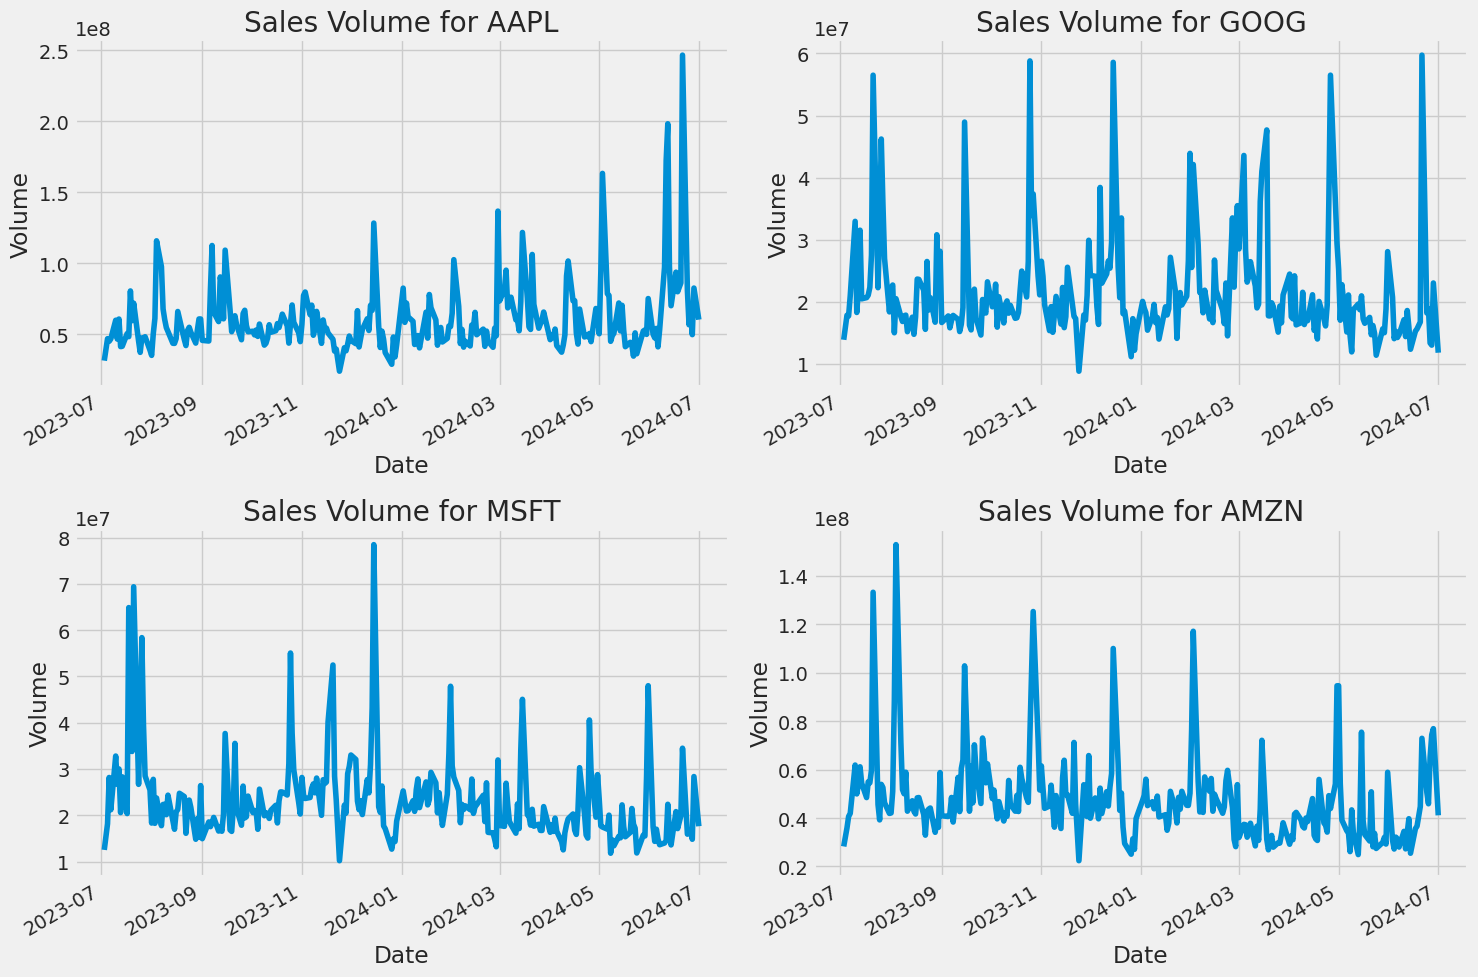

In [99]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

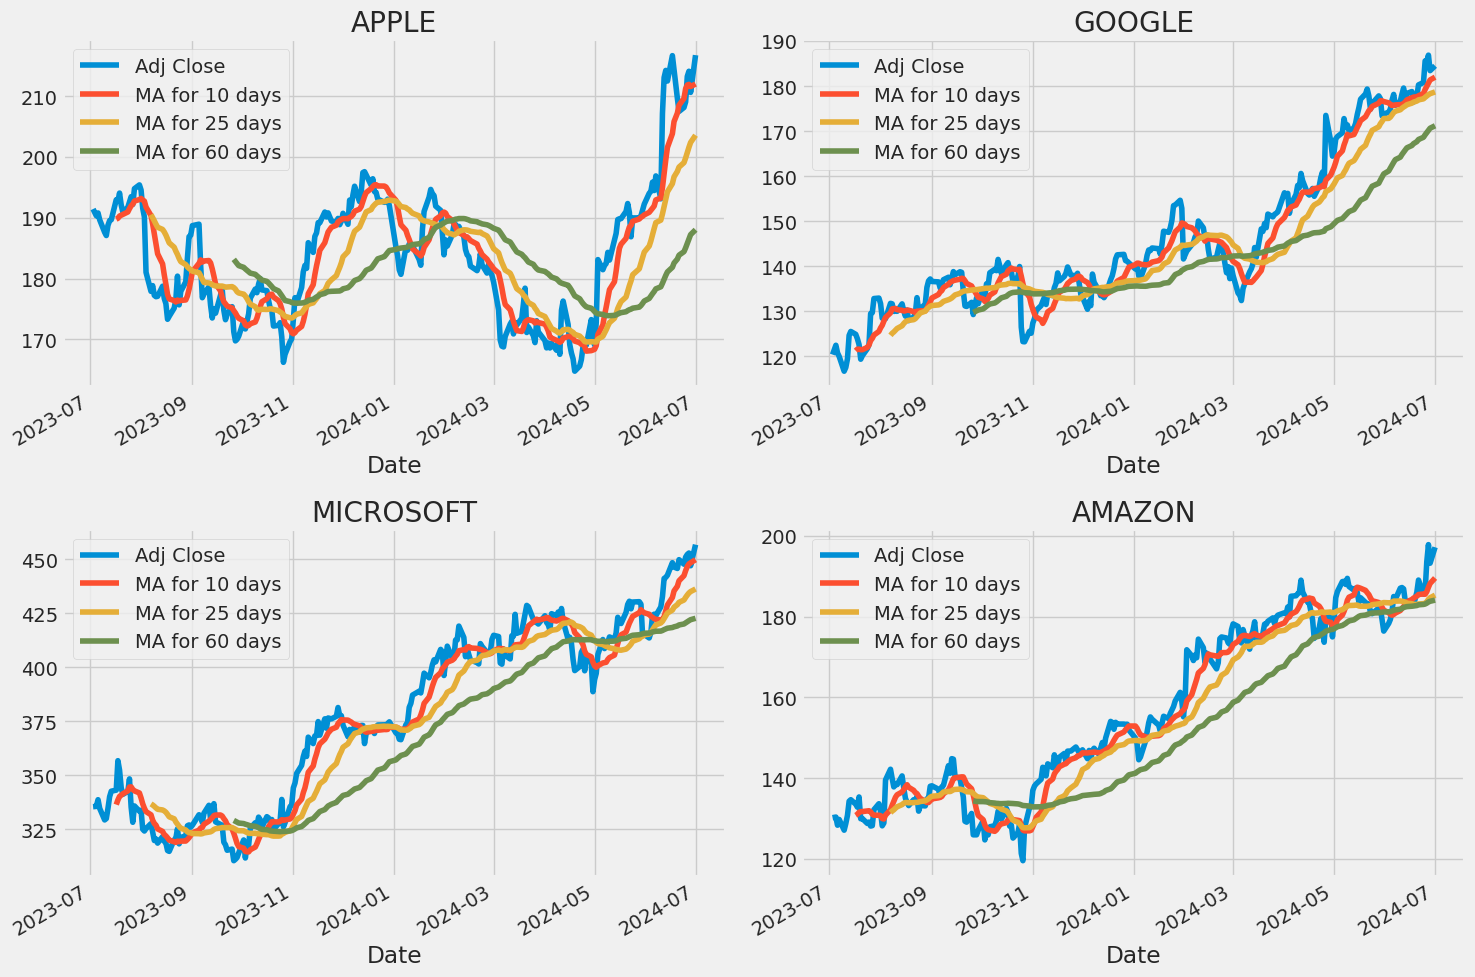

In [100]:
ma_day = [10, 25, 60]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

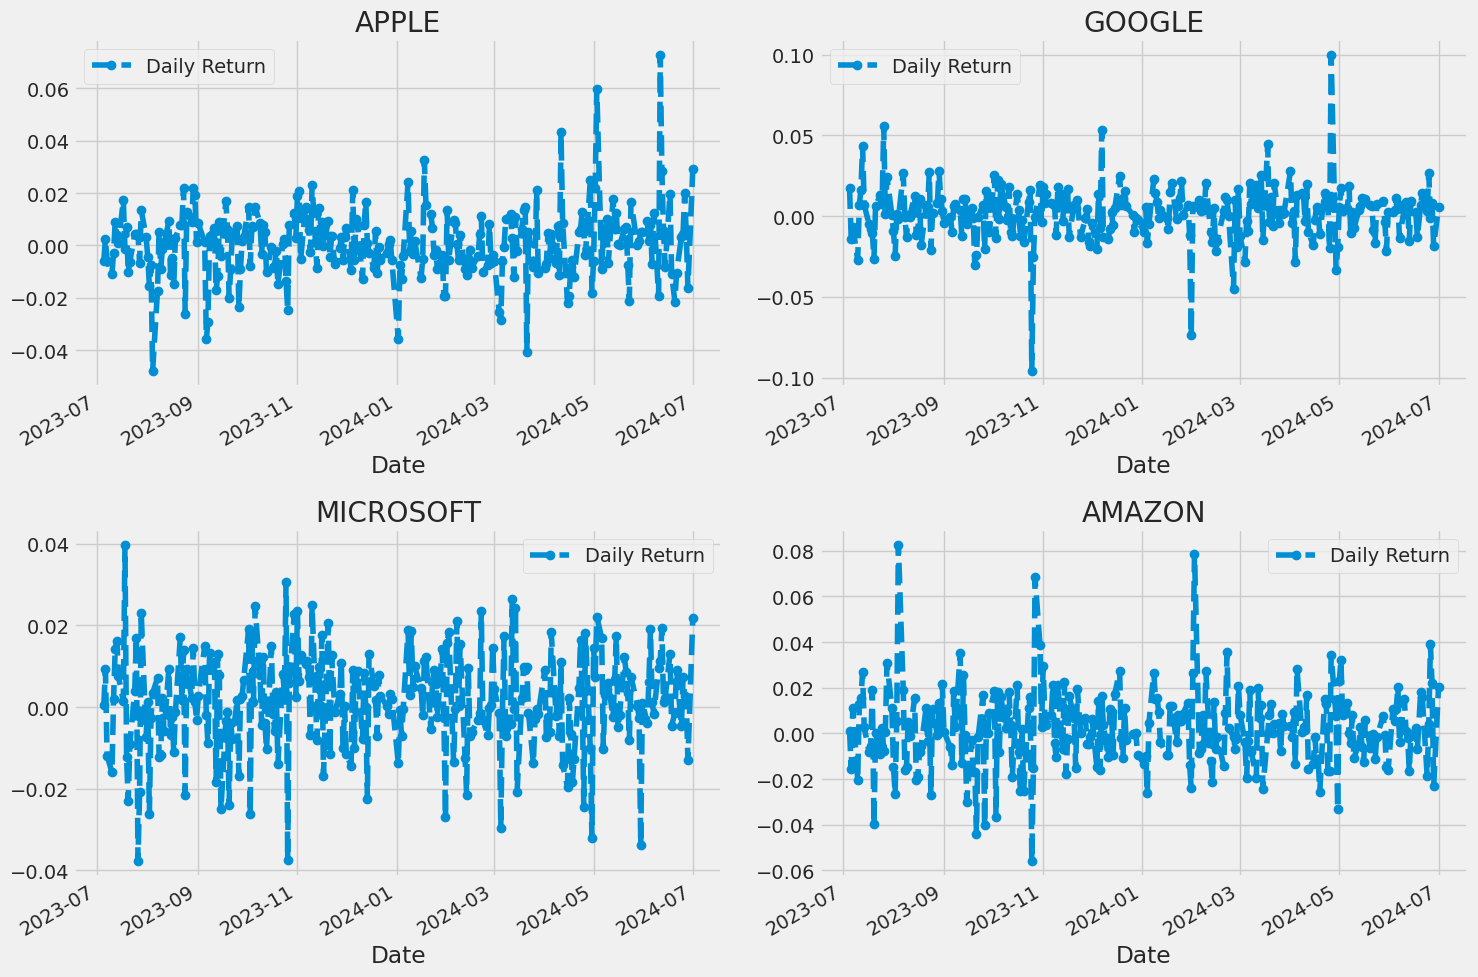

In [101]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

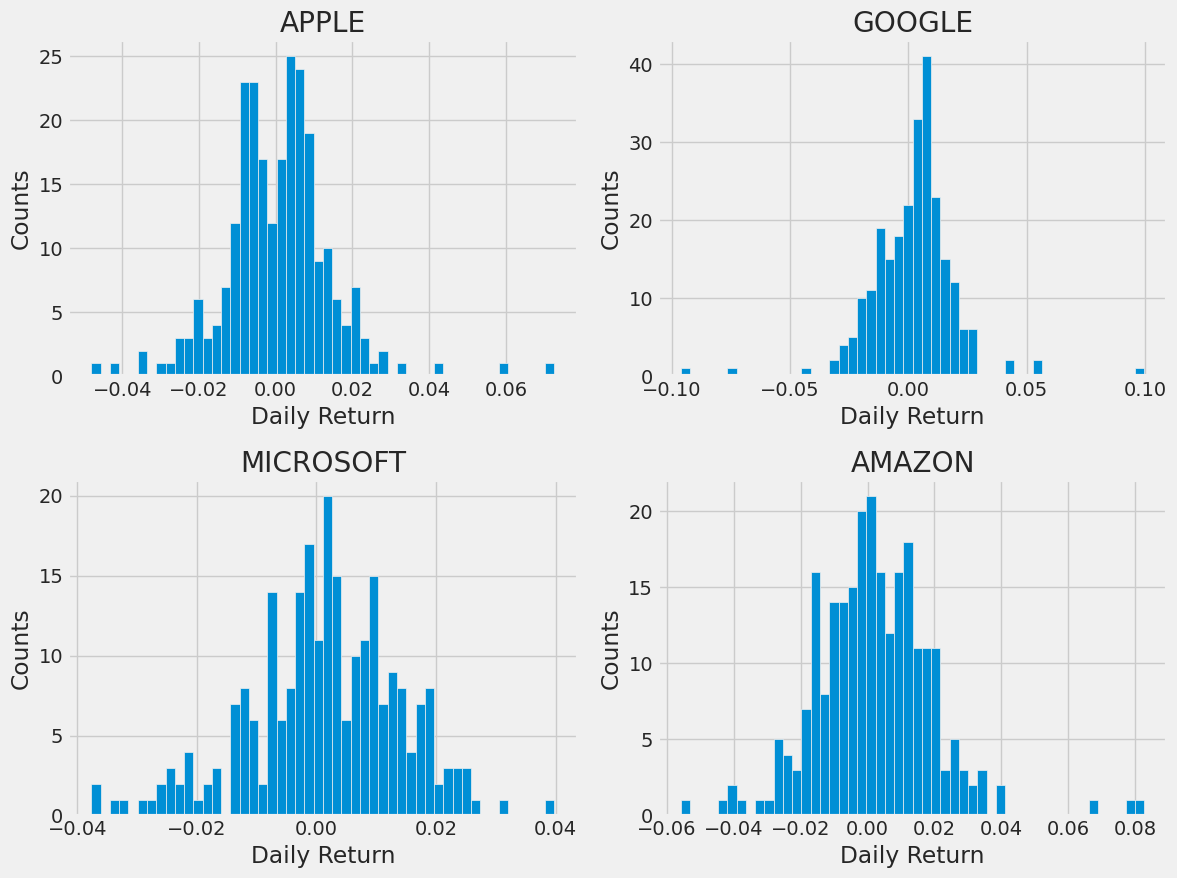

In [102]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [103]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-03,NaN,NaN,NaN,NaN
2023-07-05,-0.005871,0.001229,0.017170,0.000473
2023-07-06,0.002509,-0.015493,-0.013863,0.009227
2023-07-07,-0.005891,0.011063,-0.006533,-0.011867
2023-07-10,-0.010856,-0.020419,-0.027218,-0.015984


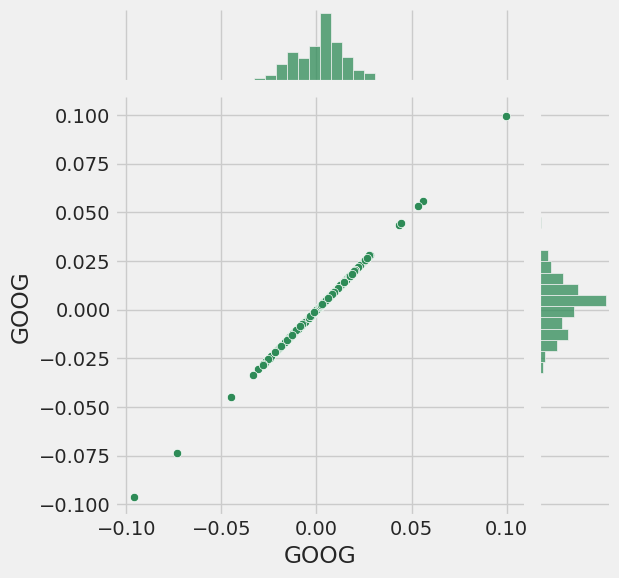

In [104]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

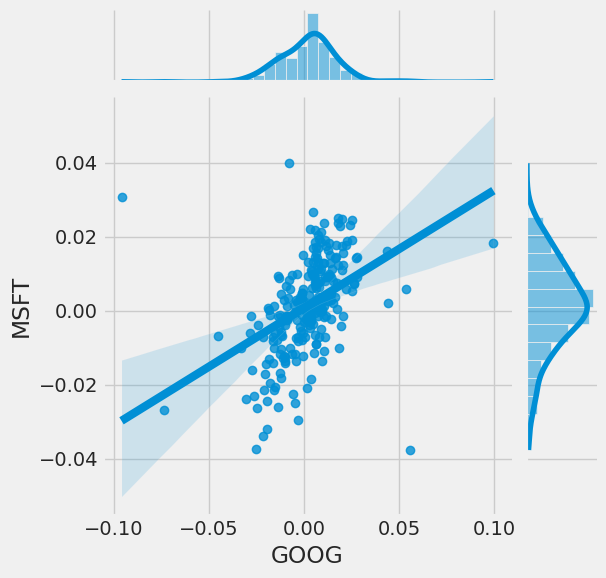

In [105]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='reg')

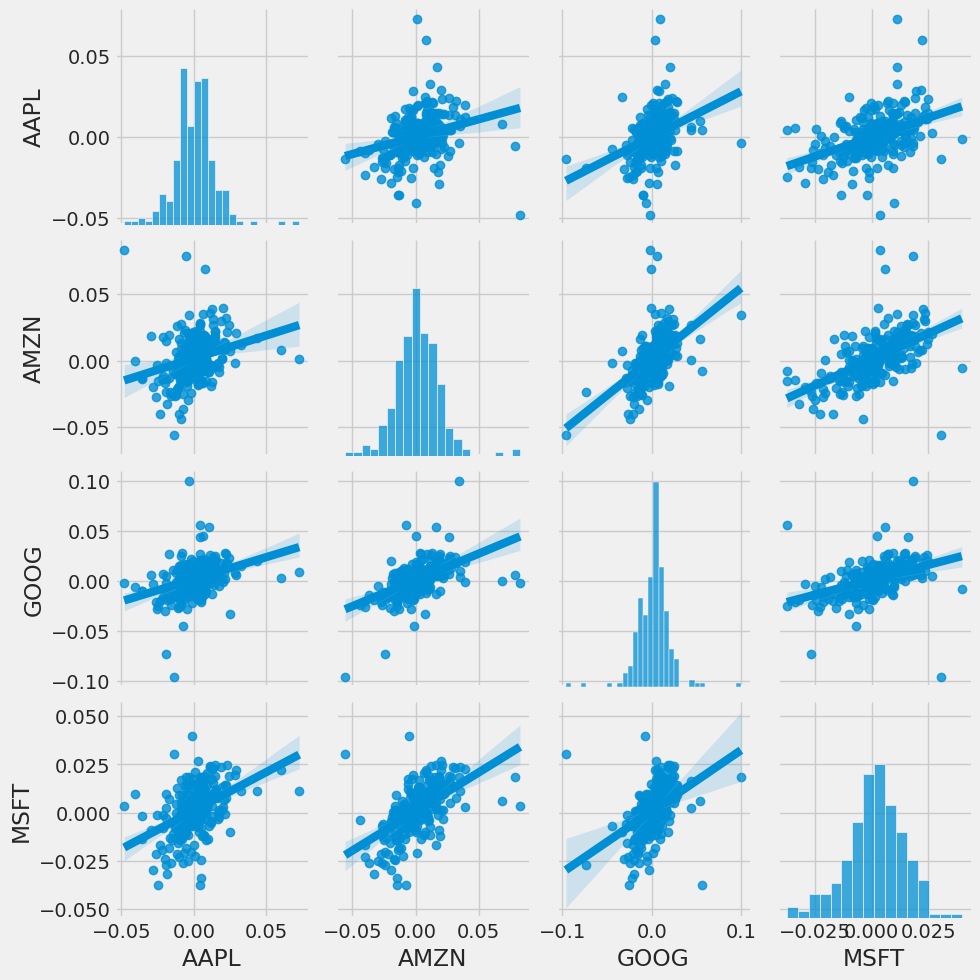

In [106]:
sns.pairplot(tech_rets, kind='reg')

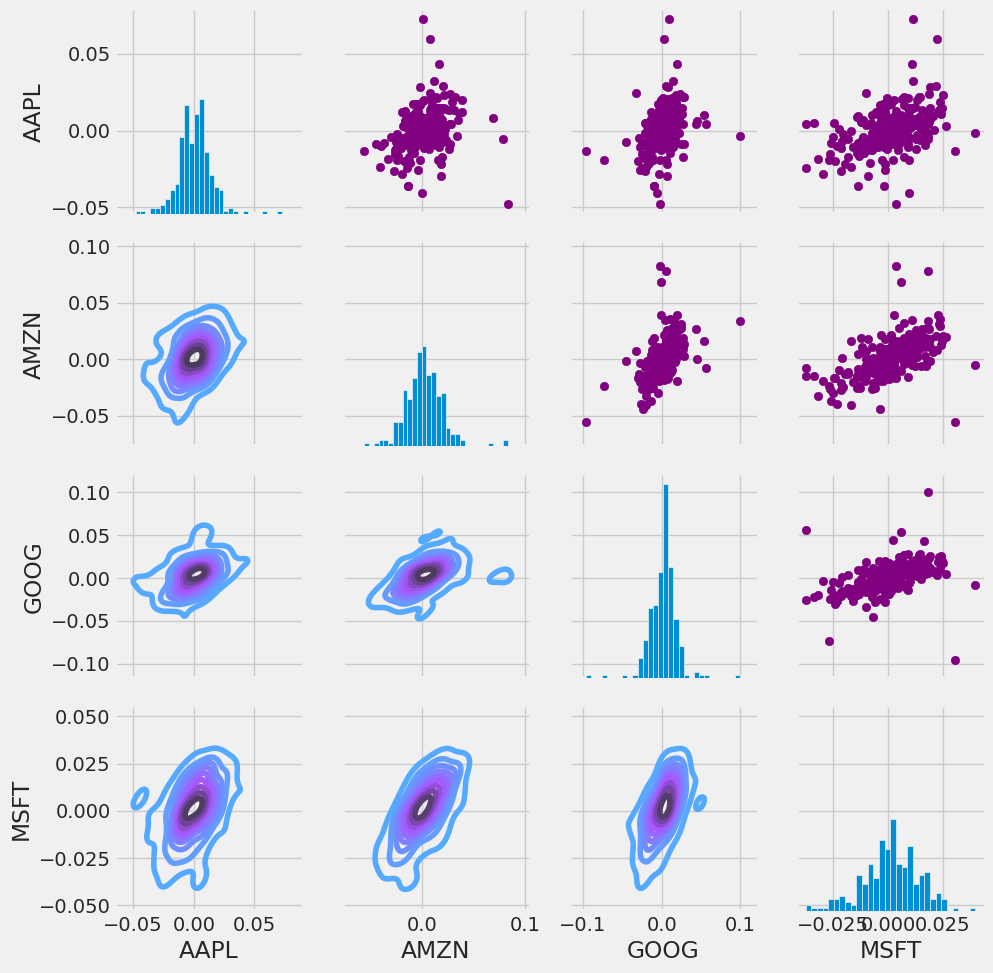

In [107]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

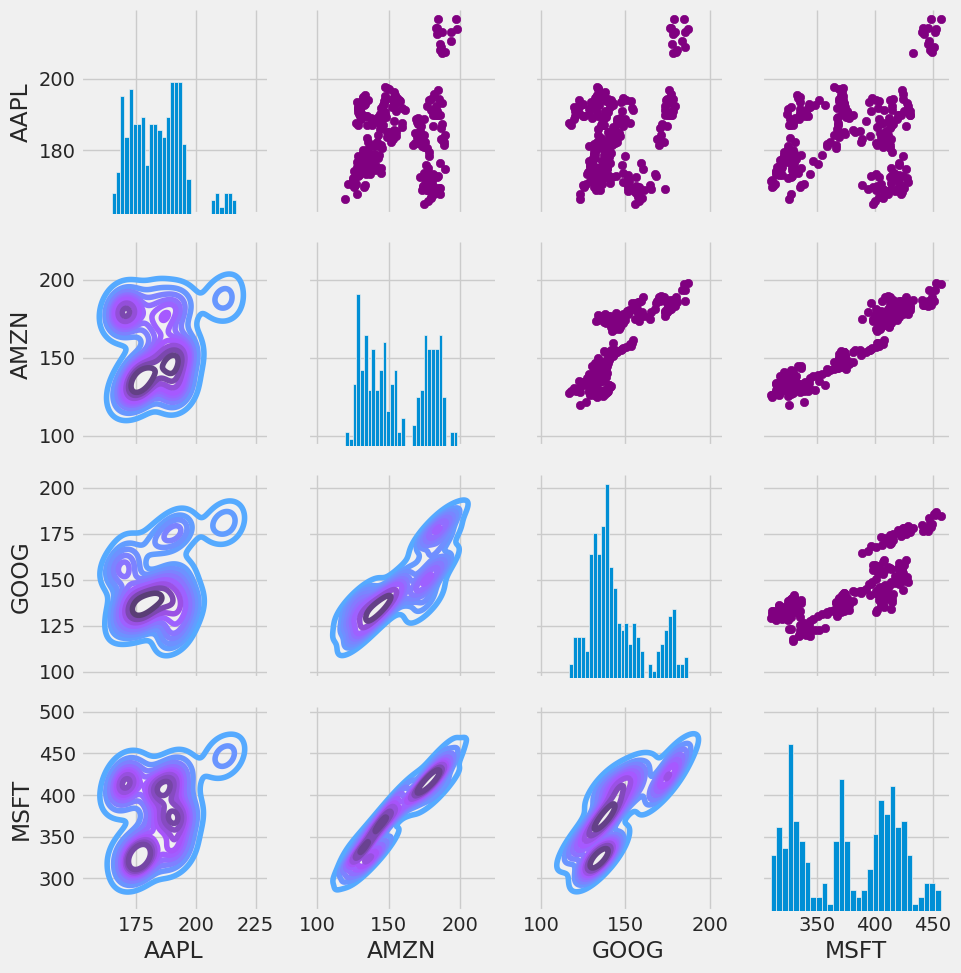

In [108]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

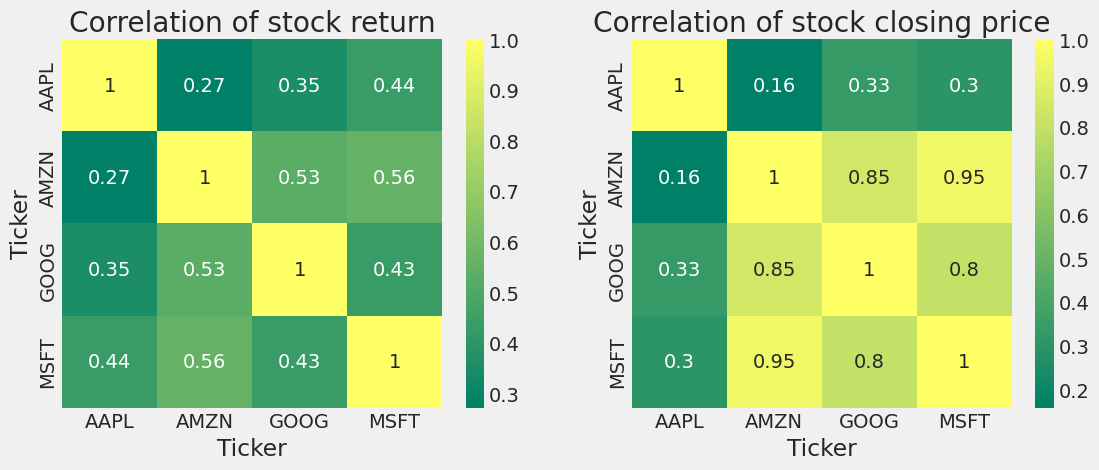

In [109]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

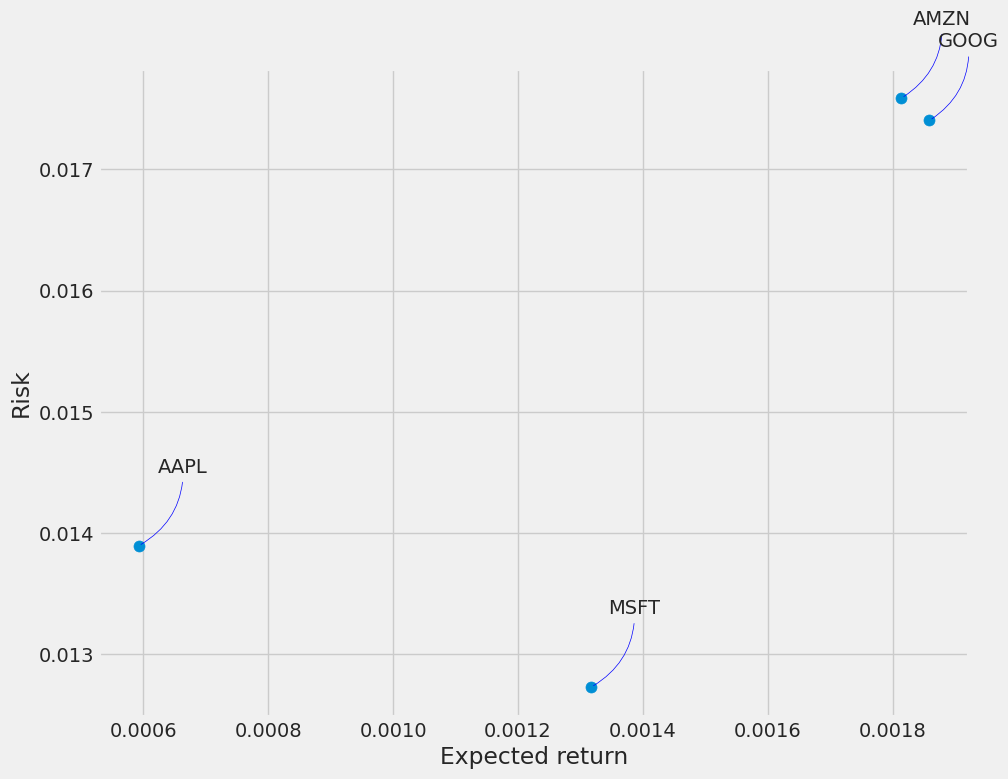

In [110]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [111]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416984,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483716,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754256,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734029,394024400
...,...,...,...,...,...,...
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700


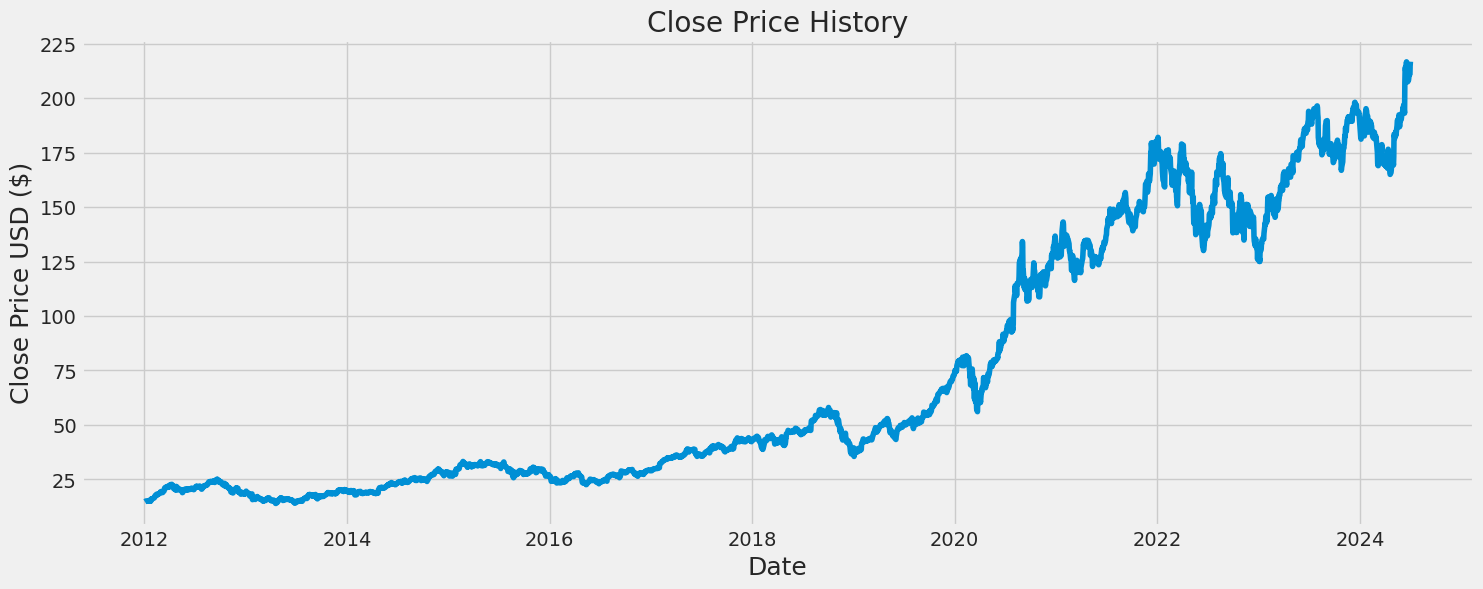

In [112]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [113]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2986

In [114]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00364535],
       [0.00403453],
       [0.00484285],
       ...,
       [0.98693313],
       [0.96977352],
       [1.        ]])

In [115]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00364535, 0.00403453, 0.00484285, 0.00561243, 0.00549444,
       0.00576035, 0.00563884, 0.00543456, 0.00515631, 0.00601746,
       0.00679408, 0.00655458, 0.0052426 , 0.00649471, 0.00526198,
       0.0098847 , 0.00952722, 0.00999389, 0.01100296, 0.01161404,
       0.01156297, 0.01137454, 0.01217757, 0.01293306, 0.01378893,
       0.01517134, 0.01807529, 0.01811932, 0.01973595, 0.02094402,
       0.01886776, 0.01966727, 0.01965142, 0.02189322, 0.02157447,
       0.02216442, 0.02322456, 0.02381452, 0.02551392, 0.02675192,
       0.02710941, 0.02723445, 0.02511768, 0.02460698, 0.02468271,
       0.02667268, 0.02723269, 0.02843548, 0.03127075, 0.03505346,
       0.03434552, 0.03434728, 0.03708217, 0.03793804, 0.03732871,
       0.03677223, 0.03619285, 0.03811766, 0.03943844, 0.03999141])]
[0.03862483852513095]

[array([0.00364535, 0.00403453, 0.00484285, 0.00561243, 0.00549444,
       0.00576035, 0.00563884, 0.00543456, 0.00515631, 0.00601746,
       0.00679408, 0.00655458, 0.00

**Model Training **

In [117]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
history=model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2926/2926 [==============================] - 165s 55ms/step - loss: 0.0013 - accuracy: 3.4176e-04
Epoch 2/10
2926/2926 [==============================] - 153s 52ms/step - loss: 4.5407e-04 - accuracy: 3.4176e-04
Epoch 3/10
2926/2926 [==============================] - 152s 52ms/step - loss: 3.9749e-04 - accuracy: 3.4176e-04
Epoch 4/10
2926/2926 [==============================] - 153s 52ms/step - loss: 2.3829e-04 - accuracy: 3.4176e-04
Epoch 5/10
2926/2926 [==============================] - 154s 53ms/step - loss: 2.5369e-04 - accuracy: 3.4176e-04
Epoch 6/10
2926/2926 [==============================] - 148s 51ms/step - loss: 2.1776e-04 - accuracy: 3.4176e-04
Epoch 7/10
2926/2926 [==============================] - 150s 51ms/step - loss: 1.8207e-04 - accuracy: 3.4176e-04
Epoch 8/10
2926/2926 [==============================] - 151s 52ms/step - loss: 1.8480e-04 - accuracy: 3.4176e-04
Epoch 9/10
2926/2926 [==============================] - 150s 51ms/step - loss: 1.8305e-04 - accuracy

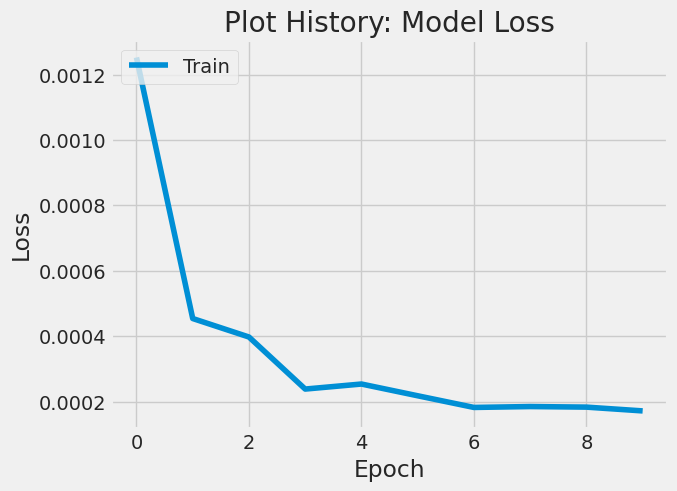

In [120]:
plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='test loss')
plt.title('Plot History: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [129]:
model.save('stock_pred.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [130]:
from keras.models import load_model

# Load the model
model_1 = load_model('stock_pred.h5')

In [131]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model_1.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('Predications on past data : ',predictions)
print('RMS error : ',rmse)

5/5 [==============================] - 1s 35ms/step
Predications on past data :  [[200.52234]
 [201.65952]
 [201.82185]
 [202.56644]
 [202.56212]
 [203.3029 ]
 [202.96486]
 [203.27322]
 [202.69678]
 [202.6334 ]
 [202.82068]
 [202.4056 ]
 [202.65706]
 [203.14331]
 [202.45349]
 [204.08665]
 [203.59644]
 [204.51138]
 [205.04141]
 [204.09288]
 [204.73724]
 [205.93015]
 [206.02802]
 [205.91647]
 [205.24019]
 [205.6284 ]
 [204.70766]
 [204.68184]
 [204.17468]
 [203.95897]
 [203.96979]
 [204.13705]
 [203.73718]
 [201.02568]
 [200.4236 ]
 [199.26196]
 [198.9278 ]
 [200.61148]
 [200.50134]
 [201.10025]
 [200.8819 ]
 [201.05067]
 [200.11519]
 [199.72221]
 [201.98958]
 [203.15602]
 [204.2958 ]
 [204.90958]
 [204.69823]
 [204.57191]
 [203.80676]
 [203.48325]
 [201.92892]
 [200.44214]
 [201.27841]
 [200.7883 ]
 [201.62375]
 [202.27963]
 [202.42212]
 [202.05685]
 [202.26799]
 [201.54832]
 [200.7105 ]
 [200.28134]
 [200.09003]
 [199.45197]
 [199.14914]
 [199.41214]
 [200.22554]
 [199.55217]
 [199.080

<ipython-input-132-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


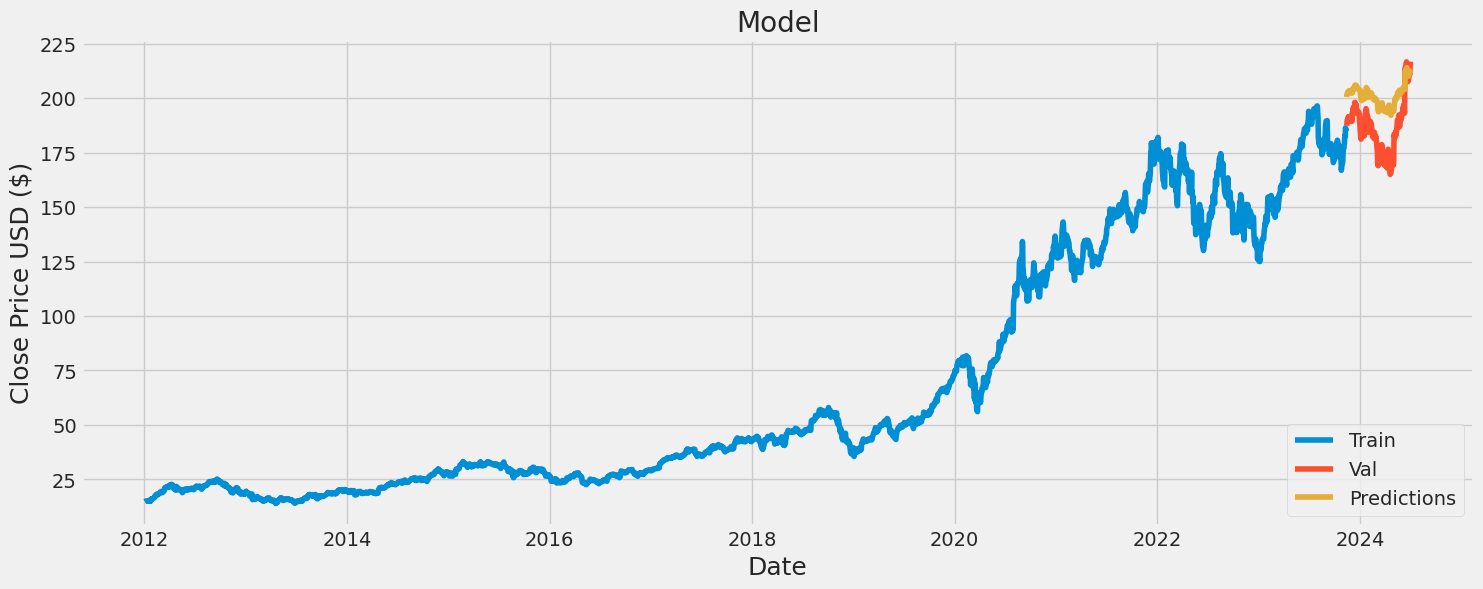

In [132]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [133]:
#Show the valid and predicted prices

valid.tail(15)

,Close,Predictions
Date,,
2024-06-10,193.119995,205.607224
2024-06-11,207.149994,204.031860
2024-06-12,213.070007,209.724167
2024-06-13,214.240005,211.892014
2024-06-14,212.490005,212.822708
2024-06-17,216.669998,212.277588
2024-06-18,214.289993,213.974533
2024-06-20,209.679993,212.800522
2024-06-21,207.490005,211.079300


**Predicting the Apple stock value tomorrow !!**

In [135]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import yfinance as yf

# Get the stock quote
yf.pdr_override()  # Override yfinance to use pandas_datareader
stock_quote = pdr.get_data_yahoo('AAPL', start='2024-06-01', end=datetime.now())

# Filter for the 'Open' column
new_df = stock_quote.filter(['Open'])

# Get the data for fitting the scaler (you might need more historical data for better scaling)
# Here, fitting with the last 2 years of data
fit_data = pdr.get_data_yahoo('AAPL', start='2022-01-28', end='2024-06-27')
fit_open_data = fit_data.filter(['Open'])

# Initialize and fit the scaler with historical data
scaler = MinMaxScaler()
scaler.fit(fit_open_data)

# Get the last 60 days values and convert them into an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data into a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Get predicted scaled price
pred_price = model_1.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(f'Opening Price of AAPL tomorrow: {pred_price[0][0]}')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 1s/step
Opening Price of AAPL tomorrow: 208.87661743164062


**Predictiong the Apple Stock value for next 6 months**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
                          Date  Predicted_Open
0   2024-07-02 11:50:10.718731      208.893692
1   2024-07-03 11:50:10.718731      206.228149
2   2024-07-04 11:50:10.718731      203.576279
3   2024-07-05 11:50:10.718731      200.970642
4   2024-07-08 11:50:10.718731      198.465607
..                         ...             ...
121 2024-12-18 11:50:10.718731      141.726166
122 2024-12-19 11:50:10.718731      141.673355
123 2024-12-20 11:50:10.718731      141.622055
124 2024-12-23 11:50:10.718731      141.572235
125 2024-12-24 11:50:10.718731      141.523849

[126 rows x 2 columns]


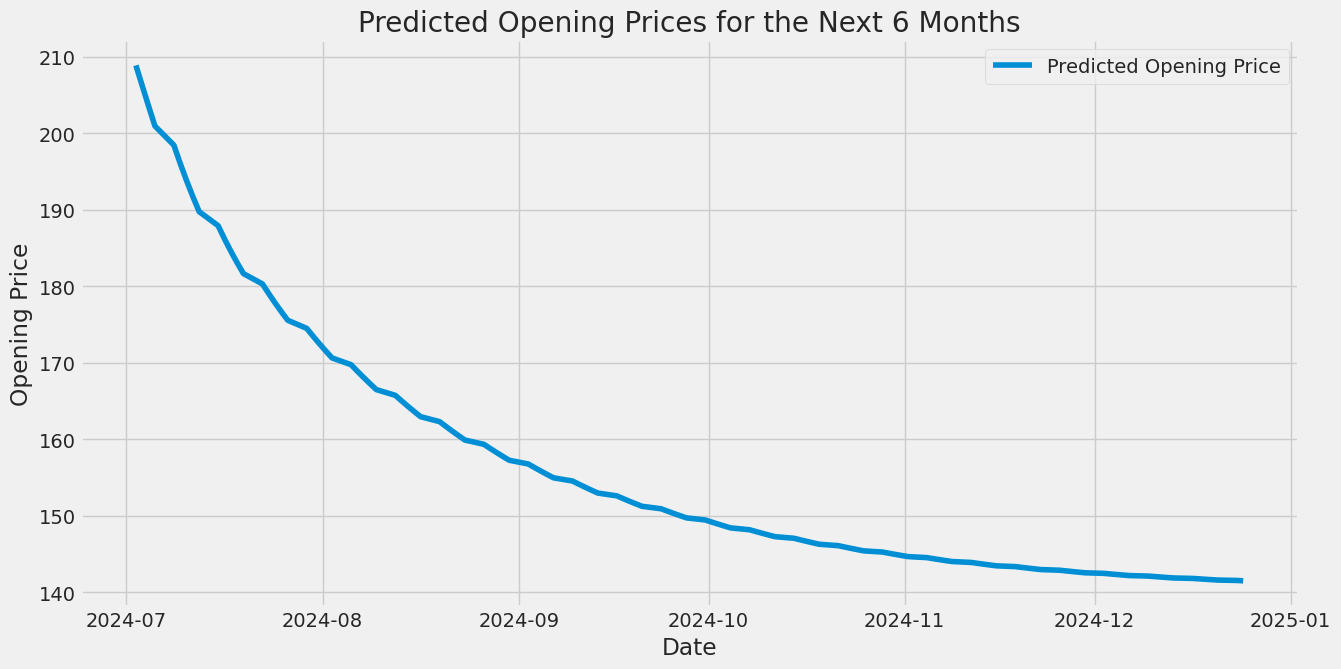